## Mobile Price Classification

### About Dataset
Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

# Import Datasets

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree
data = pd.read_csv('../datasets/mobilePrice/train.csv')
test = pd.read_csv('../datasets/mobilePrice/test.csv')

In [2]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [6]:
test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [7]:
# Preview the dataset (train)
df = pd.DataFrame(data)

In [8]:
# Preview the dataset (test)
df_test = pd.DataFrame(test)

# Check Data (pricePrediction.ipynb)

# Wat hier gebeurd word allemaal beschreven in pricePrediction.ipynb

### Mobile depth

In [9]:
# Find values boven 0.5 cm (drempelwaarde) en pak gemiddelde
average_above_threshold = df["m_dep"][df["m_dep"] >= 0.5].mean()
print(round(average_above_threshold,2))
average_above_threshold_test = df_test["m_dep"][df_test["m_dep"] >= 0.5].mean()
print(round(average_above_threshold_test,2))

0.73
0.72


In [10]:
# Replace values below 0.5 cm with 0.5 cm
df_test.loc[df_test["m_dep"] < 0.5, "m_dep"] = round(average_above_threshold, 2)
df.loc[df["m_dep"] < 0.5, "m_dep"] = round(average_above_threshold, 2)
df_test.m_dep.min(),df.m_dep.min()


(0.5, 0.5)

### Pixel Height

In [11]:
amount = len(df["px_height"][df["px_height"] < 65])
print("Amount of values that are under 65 pixels", amount)

Amount of values that are under 65 pixels 90


In [14]:
# Replace values below 65 pixels with 65 pixels
df.loc[df["px_height"] < 65, "px_height"] = 65
df_test.loc[df_test["px_height"] < 65, "px_height"] = 65

### Screen Width

In [15]:
amount = len(df["sc_w"][df["sc_w"] < 2])
print("Amount of values that are under 2 cm", amount)

Amount of values that are under 2 cm 390


In [16]:
# Replace values below 65 pixels with 65 pixels
df_test.loc[df_test["sc_w"] < 2,"sc_w"] = 2
df.loc[df["sc_w"] < 2,"sc_w"] = 2

Overbodige tabellen weghalen. Bv id in test set

In [17]:
df_test.drop(['id'], axis=1, inplace=True)

# SVM

In [18]:
df2 = df

In [19]:
df2

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.60,188,2,...,65,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.70,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.90,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.80,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.60,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.80,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.73,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.70,108,8,...,868,1632,3057,9,2,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.73,145,5,...,336,670,869,18,10,19,1,1,1,0


In [20]:
df_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.73,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.80,191,5,12,746,857,3895,6,2,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.90,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.50,96,8,20,295,1752,3893,10,2,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.50,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.50,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.90,186,4,2,1152,1632,1933,8,2,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.50,80,1,12,477,825,1223,5,2,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.73,171,2,12,65,832,2509,15,11,6,0,1,0


In [23]:
X = df2.drop('price_range', axis=1)
y = df2['price_range'].values.reshape(-1, 1).ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In een SVM-algoritme regelt de regularisatieparameter C het evenwicht tussen het bereiken van een lage trainingsfout en een lage testfout. C is een hyperparameter die de straf bepaalt voor het verkeerd classificeren van trainingsvoorbeelden. Met andere woorden, het controleert de afweging tussen de complexiteit van het model en de mate waarin het past bij de trainingsgegevens.

Een kleine waarde van C zal een eenvoudige beslissingsgrens creëren met een grotere marge, maar kan meer verkeerd geclassificeerde trainingsvoorbeelden toestaan. Aan de andere kant zal een grote waarde van C een complexe beslissingsgrens creëren die nauw aansluit bij de trainingsgegevens, maar kan leiden tot overfitting en slechte generalisatieprestaties op de testgegevens.

Wiskundig gezien is de regularisatieparameter C een positieve constante die de som van de slackvariabelen vermenigvuldigt in het optimalisatieprobleem van SVM. De slackvariabelen staan toe dat sommige trainingsvoorbeelden verkeerd worden geclassificeerd en helpen bij het vinden van een hyperplane die de gegevens scheidt met de grootst mogelijke marge.

Bij het afstemmen van de C-hyperparameter kun je technieken zoals cross-validatie gebruiken om de optimale waarde voor jouw specifieke probleem te vinden. Een goed startpunt is om een reeks waarden voor C te proberen, zoals 0.01, 0.1, 1, 10 en 100, en degene te kiezen die de beste prestaties geeft op de validatie- of testgegevens.

In [24]:
from sklearn.svm import SVC

#Linear SVM model
clf = SVC(kernel='linear', C=1)
clf001 = SVC(kernel='linear', C=0.01)
clf.fit(X_train, y_train)
clf001.fit(X_train, y_train)
clf0001 = SVC(kernel='linear', C=0.001)
clf0001.fit(X_train, y_train)
clf100 = SVC(kernel='linear', C=100)
clf100.fit(X_train, y_train)

#kernel SVM model
clfrbf = SVC(kernel='rbf')
clfrbf.fit(X_train, y_train)

SVC()

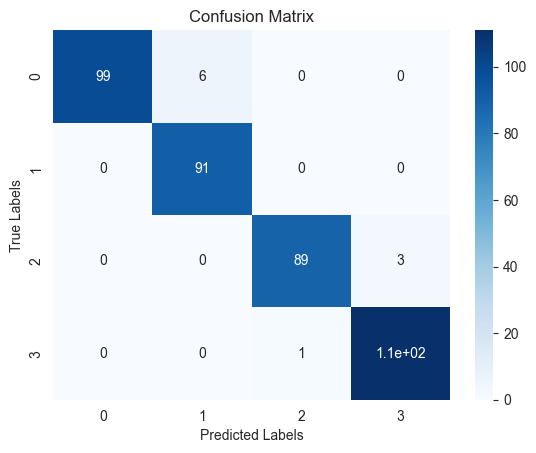

In [25]:
from sklearn.metrics import confusion_matrix

prediction = clf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, prediction)
# Create the heatmap using seaborn
sns.heatmap(cm, annot=True, cmap="Blues")
# Set the axis labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
# Show the plot
plt.show()

In [26]:
y_pred = clf.predict(X_test)
y_pred001 = clf001.predict(X_test)
y_pred0001 = clf0001.predict(X_test)
y_pred100 = clf100.predict(X_test)
y_predrbf = clfrbf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Accuracy 0.01:", accuracy_score(y_test, y_pred001))
print("Accuracy 0.001:", accuracy_score(y_test, y_pred0001))
print("Accuracy 100:", accuracy_score(y_test, y_pred100))
print("Accuracy kernel:", accuracy_score(y_test, y_predrbf))

Accuracy: 0.975
Accuracy 0.01: 0.985
Accuracy 0.001: 0.9825
Accuracy 100: 0.9725
Accuracy kernel: 0.965


In [27]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=5)
print('Accuracy scores:', scores)

Accuracy scores: [0.9775 0.9575 0.965  0.9775 0.98  ]


# Conclusie SVM

Ik heb drie verschillende algoritmes gebruikt om een model te trainen om de prijs van een telefoon te kunnen voorspellen. Het SVM algoritme heeft uiteindlijk de hoogste accuracy score behaalt. (Score: 0.985, in file: pricePredictionSVM)  Ik ben wel bang dat dit mogelijk overfitting is. Ik heb daarom cross-validation gebruikt, zodat ik goed kon zien wat de echte performance is van het model. Misschien meer data zou dit kunnen oplossen.

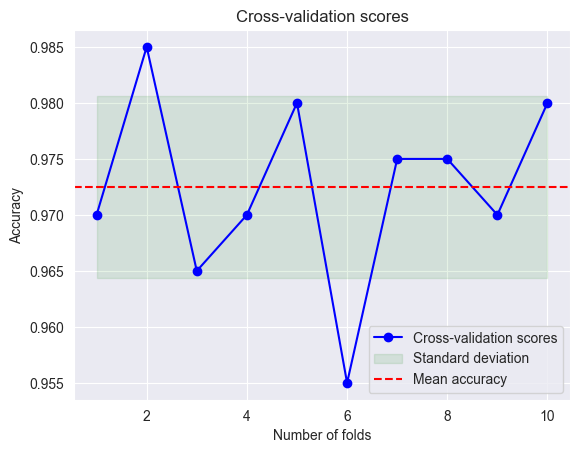

In [28]:
import numpy as np
# Perform cross-validation and get the accuracy scores
scores = cross_val_score(clf, X, y, cv=10)
# Calculate the mean and standard deviation of the scores
mean_score = np.mean(scores)
std_score = np.std(scores)

# Plot the results
plt.figure()
plt.title("Cross-validation scores")
plt.xlabel("Number of folds")
plt.ylabel("Accuracy")
plt.plot(range(1, 11), scores, 'bo-', label="Cross-validation scores")
plt.fill_between(range(1, 11), mean_score - std_score, mean_score + std_score, alpha=0.1, color='g', label="Standard deviation")
plt.axhline(y=mean_score, color='r', linestyle='--', label="Mean accuracy")
plt.legend(loc="lower right")
plt.show()